## 092260 - HW1
### Submitted by Tom Ron 305065658

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 5)})

from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

## Data loading and plotting

In [2]:
yield_data = pd.read_csv("data/YieldCurve.csv", parse_dates=['Date'])
moodys_data = pd.read_csv("data/BAA10Y.csv", parse_dates=['DATE']).rename(columns={"DATE":"Date"}).replace(".", np.nan)

Manually create date axis due to missing dates in both datasets

In [3]:
print("Yield date range: ({}, {})".format(yield_data['Date'].min().strftime("%Y-%m-%d"),
                                          yield_data['Date'].max().strftime("%Y-%m-%d")))
print("Moodys date range: ({}, {})".format(moodys_data['Date'].min().strftime("%Y-%m-%d"),
                                           moodys_data['Date'].max().strftime("%Y-%m-%d")))
min_date = min(yield_data['Date'].min(), moodys_data['Date'].min())
max_date = max(yield_data['Date'].max(), moodys_data['Date'].max())

dates_idx = pd.date_range(start=min_date, end=max_date, freq='B') # Buisness days, exclude weekends
dates = pd.DataFrame({'Date': dates_idx})

Yield date range: (1990-01-02, 2019-12-06)
Moodys date range: (1986-01-02, 2019-12-05)


In [4]:
dates

,Date
0,1986-01-02
1,1986-01-03
2,1986-01-06
3,1986-01-07
4,1986-01-08
5,1986-01-09
6,1986-01-10
7,1986-01-13
8,1986-01-14
9,1986-01-15


In [5]:
yield_data_full = pd.merge(dates, yield_data, on='Date', how='left')
moodys_data_full = pd.merge(dates, moodys_data, on='Date', how='left')
data = pd.merge(yield_data_full, moodys_data_full, on='Date')

In [6]:
data

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,BAA10Y
0,1986-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.34
1,1986-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.30
2,1986-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.29
3,1986-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.35
4,1986-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.21
5,1986-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.16
6,1986-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.06
7,1986-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03
8,1986-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.03
9,1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.20


In [7]:
cols = list(data.columns)
data[cols[1:]] = data[cols[1:]].apply(pd.to_numeric)
melted_data = pd.melt(data, ['Date'])

In [8]:
melted_data

,Date,variable,value
0,1986-01-02,1 Mo,NaN
1,1986-01-03,1 Mo,NaN
2,1986-01-06,1 Mo,NaN
3,1986-01-07,1 Mo,NaN
4,1986-01-08,1 Mo,NaN
5,1986-01-09,1 Mo,NaN
6,1986-01-10,1 Mo,NaN
7,1986-01-13,1 Mo,NaN
8,1986-01-14,1 Mo,NaN
9,1986-01-15,1 Mo,NaN


### Plots

In [ ]:
# Moody's
plot_data = melted_data[melted_data['variable'] == 'BAA10Y']
sns.lineplot(x='Date', y='value', hue='variable', data=plot_data)

In [ ]:
# Short term yields
plot_data = melted_data[melted_data['variable'].isin([x for x in cols if 'Mo' in x])]
sns.lineplot(x='Date', y='value', hue='variable', data=plot_data)

In [ ]:
# Medium term yields
plot_data = melted_data[melted_data['variable'].isin(['1 Yr', '2 Yr', '3 Yr', '5 Yr'])]
sns.lineplot(x='Date', y='value', hue='variable', data=plot_data)

In [ ]:
# Long term yields
plot_data = melted_data[melted_data['variable'].isin(['10 Yr', '20 Yr', '30 Yr'])]
sns.lineplot(x='Date', y='value', hue='variable', data=plot_data)

### Missing Data

In [9]:
data.groupby(pd.Grouper(key='Date', freq='1m')).count()

,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,BAA10Y
Date,,,,,,,,,,,,,
1986-01-31,0,0,0,0,0,0,0,0,0,0,0,0,21
1986-02-28,0,0,0,0,0,0,0,0,0,0,0,0,19
1986-03-31,0,0,0,0,0,0,0,0,0,0,0,0,20
1986-04-30,0,0,0,0,0,0,0,0,0,0,0,0,22
1986-05-31,0,0,0,0,0,0,0,0,0,0,0,0,21
1986-06-30,0,0,0,0,0,0,0,0,0,0,0,0,21
1986-07-31,0,0,0,0,0,0,0,0,0,0,0,0,22
1986-08-31,0,0,0,0,0,0,0,0,0,0,0,0,21
1986-09-30,0,0,0,0,0,0,0,0,0,0,0,0,21


## Q.2
Do some machine learning big data AI cloud IoT magic

Looking at the table above we conclude:
    1. Get rid of the 1 Mo, 2 Mo, 20 Yr yield columns, almost no data
    2. Filter from 01/01/1991 (no yield data before that)

## Data pre processing
For each day and each yield, compute:
    1. yields in [0,-1,-2,-3,-4,-5,-6,-7, -14, -28] lookback days
    2. mean yield in past 28 days
    3. median yield in past 28 days
    4. yield variance in past 28 days

In [448]:
f_data = data[(data['Date'] > '1990-01-01')]
f_data = f_data[[col for col in f_data.columns if col != 'Date']]
f_data = f_data[[col for col in f_data.columns if col not in ['1 Mo', '2 Mo', '20 Yr']]]
f_data = f_data[[col for col in f_data.columns if col in ['3 Mo', '1 Yr', 'BAA10Y']]]
f_data = f_data.dropna(axis=0, how='any')

# Subtract consecutive days
# f_data = f_data - f_data.shift(1)
# f_data = f_data[1:]
f_data

,3 Mo,1 Yr,BAA10Y
1043,7.83,7.81,1.91
1044,7.89,7.85,1.87
1045,7.84,7.82,1.86
1046,7.79,7.79,1.89
1047,7.79,7.81,1.86
1048,7.80,7.78,1.84
1049,7.75,7.77,1.85
1050,7.80,7.77,1.82
1051,7.74,7.76,1.77
1053,7.89,7.92,1.72


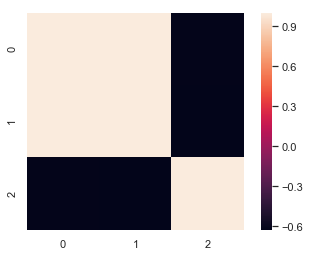

In [463]:
sns.heatmap(np.corrcoef(f_data.values.T), square=True)

In [464]:
def get_lookback(data, pos, lookback_arr):
    columns = data.shape[1]
    res = np.zeros(shape=(len(lookback_arr), columns), dtype=np.float32)
    for i, period in enumerate(lookback_arr):
        relative = pos + period
        if relative < 0 :
            continue
        res[i] = data[relative]
    return res.reshape(-1)

In [465]:
def get_agg(data, pos, lookback, action):
    relative = min(pos, lookback)
    if action == 'mean':
        return np.mean(data[pos-relative:pos+1], axis=0)
    if action == 'median':
        return np.median(data[pos-relative:pos+1], axis=0)
    if action == 'std':
        return np.std(data[pos-relative:pos+1], axis=0)

In [466]:
def create_features(data):
    lookbacks = [0, -1, -2, -3, -4, -5, -6, -7, -10, -14, -28, -35, -42]
#     lookbacks = [0, -1, -2, -3, -4, -5, -6, -7]
    aggs = ['mean', 'median', 'std']
#     aggs = []
    rows = data.shape[0]
    columns = data.shape[1]
    num_features = columns * (len(lookbacks) + len(aggs))
    X = np.zeros(shape=(rows, num_features), dtype=np.float32)
    y = np.zeros(shape=(rows, columns), dtype=np.float32)
    for i in range(data.shape[0]):
        lookbacks_arr = get_lookback(data, i, lookbacks)
        mean_arr = get_agg(data, i, 35, 'mean')
        median_arr = get_agg(data, i, 35, 'median')
        std_arr = get_agg(data, i, 35, 'std')
#         X[i] = lookbacks_arr
        X[i] = np.concatenate((lookbacks_arr, mean_arr, median_arr, std_arr), axis=0)

        try:
            y[i] = data[i+1] - data[i]
        except:
            y[i] = np.zeros(columns, dtype=np.int32)
            
    y[y >= 0] = 1
    y[y < 0] = 0
        
    return X, y.astype(np.uint8)

In [467]:
def ts_train_test_split(X, y, test_prop=0.2):
    split_idx = int(np.floor(X.shape[0]*(1-test_prop)))
    X_train = X[:split_idx]
    X_test = X[split_idx:]
    y_train = y[:split_idx]
    y_test = y[split_idx:]
    print("X_train shape: {}, y_train shape: {}".format(X_train.shape, y_train.shape))
    print("X_test shape: {}, y_test shape: {}".format(X_test.shape, y_test.shape))
    return X_train, X_test, y_train, y_test

In [486]:
from sklearn.model_selection import train_test_split

# Prepare the data
X, y = create_features(f_data.values)
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
X_train, X_test, y_train, y_test = ts_train_test_split(X, y, random_state=0, train_size=0.2)

## Data analysis

In [487]:
# import allthemodels
from sklearn.linear_model import LogisticRegression as lr
from sklearn.svm import SVC as svc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# XGB

In [488]:
col = '1 Yr'
col_idx = list(f_data.columns).index(col)

In [489]:
model = xgb.XGBClassifier(objective='binary:logistic', 
                          learning_rate=0.1,
                          n_estimators=500)
model.fit(X_train, y_train[:,col_idx])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=500, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [490]:
y_pred = model.predict(X_train)
print(classification_report(y_train[:,col_idx], y_pred))

              precision    recall  f1-score   support

           0       0.89      0.55      0.68      2455
           1       0.75      0.95      0.84      3531

   micro avg       0.79      0.79      0.79      5986
   macro avg       0.82      0.75      0.76      5986
weighted avg       0.81      0.79      0.77      5986



In [491]:
y_pred = model.predict(X_test)
print(classification_report(y_test[:,col_idx], y_pred))

              precision    recall  f1-score   support

           0       0.50      0.30      0.37       602
           1       0.63      0.80      0.70       895

   micro avg       0.60      0.60      0.60      1497
   macro avg       0.56      0.55      0.54      1497
weighted avg       0.57      0.60      0.57      1497



In [329]:
model = svc(max_iter=100000, C=10000, kernel='rbf')
model.fit(X_train, y_train[:,col_idx])

C:\Users\Tom\Miniconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Tom\Miniconda3\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=100000, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [332]:
model = lr(max_iter=10000, C=10000, tol=1e-5, penalty='l2')
model.fit(X_train, y_train[:,col_idx], )

C:\Users\Tom\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=1e-05, verbose=0, warm_start=False)

In [437]:
model = rfc(n_estimators=250, max_depth=15)
model.fit(X_train, y_train)
# model.fit(X_train, y_train[:,col_idx])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [438]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
# print(classification_report(y_train[:,col_idx], y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3052
           1       0.88      0.99      0.94      3061
           2       0.90      0.99      0.94      3002
           3       0.92      1.00      0.95      2943
           4       0.94      0.99      0.97      2807
           5       0.95      1.00      0.97      2781
           6       0.94      1.00      0.97      2744
           7       0.95      0.99      0.97      2735
           8       0.94      1.00      0.97      2764
           9       0.85      1.00      0.92      3028

   micro avg       0.91      1.00      0.95     28917
   macro avg       0.91      1.00      0.95     28917
weighted avg       0.91      1.00      0.95     28917
 samples avg       0.91      0.98      0.93     28917



C:\Users\Tom\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\Tom\Miniconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [439]:
y_pred = model.predict(X_test)
for column in range(y_pred.shape[1]):
    print("Class {} accuracy: {:.2f}".format(column, accuracy_score(y_test[:,column], y_pred[:,column])))
# print(classification_report(y_test[:,col_idx], y_pred))
# print("Class {} accuracy: {:.2f}".format(column, accuracy_score(y_test[:,col_idx], y_pred)))

Class 0 accuracy: 0.61
Class 1 accuracy: 0.60
Class 2 accuracy: 0.64
Class 3 accuracy: 0.59
Class 4 accuracy: 0.56
Class 5 accuracy: 0.55
Class 6 accuracy: 0.52
Class 7 accuracy: 0.53
Class 8 accuracy: 0.53
Class 9 accuracy: 0.59


In [174]:
for column in range(y_pred.shape[1]):
    print("Class {} accuracy: {:.2f}".format(column, accuracy_score(y_test[:,column], y_pred[:,column])))

IndexError: tuple index out of range

In [ ]:
X_train[:,:,col_idx].shape

In [ ]:
col = '3 Yr'
col_idx = list(f_data.columns).index(col)

X_train_f = X_train[:,:,col_idx]
y_train_f = y_train[:,col_idx]
X_test_f = X_test[:,:,col_idx]
y_test_f = y_test[:,col_idx]

In [ ]:
y_pred = model.predict(X_test_f)
print(classification_report(y_test_f, y_pred))

### Q.1 

In [ ]:
# Filter train and test data
train_lb = '1990-01-01'
train_ub = '2015-12-31'
test_lb = '2016-01-01'
test_ub = '2016-12-31'

train_data = data[(data['Date'] >= train_lb) & (data['Date'] <= train_ub)]
m_train_data = pd.melt(train_data, ['Date'])
test_data = data[(data['Date'] >= test_lb) & (data['Date'] <= test_ub)]
m_test_data = pd.melt(test_data, ['Date'])

Before analyzing trend, seasonality, stationary etc., we will need to adaquetly model the time series. We shall use ACF plots for determining the apropriate ARIMA parameters for each series.
...Turns out that the time series data has a high level of missing data. Need to impute carefully.

In [ ]:
a, b = acf(plot_data, nlags=lags, fft=True, missing='conservative', alpha=.05)

In [ ]:
b

In [ ]:
# We plot ACF for every series. We'll use FFT due to long
fig, axes = plt.subplots(len(cols[1:]), figsize=(15,70))
i = 0
nlgas = 10000
for col in cols[1:]:
    plot_data = m_train_data[m_train_data['variable'] == col]['value'].values
    
    axes[i].plot(acf(plot_data, nlags=lags, missing='conservative'))
    axes[i].set_xlabel('{}_ACF'.format(col))
    i += 1
    
#     axes[i+1].plot(pacf(plot_data, nlags=lags, missing='conservative'), label='{}_PACF'.format(col))
#     i += 1

In [ ]:
m_train_data[m_train_data['variable'] == 'BAA10Y']['value'].value_counts(dropna=False)

# To be continued...

### Q.2

We need to construct our data towards two classification tasks:

**Task 1 - Interest yield change classification**

$X_{yie}$: selected features

$y_{yie}$: Has the interest yield went up in the subsequent period - Yes (1) / No (0)

**Task 2 - Credit spread change classification**

$X_{cs}$: selected features

$y_{cs}$: Has the credit spread went up in the subsequent period - Yes (1) / No (0)

We will construct these datasets for (i) Daily, (ii) Monthly and (iii) Yearly time frames.

#### Q2.1
**Daily rates**

We will construct T-days indapendant sequences of the time series and calculate $y$ as: 

$y=0$ if $I[(R_\text{yield at t=T+1} - R_\text{yield at t=T}) \le 0]$

$y=1$ if $I[(R_\text{yield at t=T+1} - R_\text{yield at t=T}) > 0]$ 

We will address T is a hyperparameter in model evaluation.

In [ ]:
data